Algorithm

The algorithm can be broken down into 4 basic steps.

1. Construct a similarity graph
2. Determine the Adjacency matrix A, Degree matrix D and the Laplacian matrix L
3. Compute the eigenvectors of the matrix L
4. Using the second smallest eigenvector as input, and use it to classify the data (Fiedler vector)

In [1]:
#importing the important libraries for use in the networks
import numpy as np
import scipy.linalg as lg
import networkx as nx
import matplotlib.pyplot as plt
import scipy.special
%matplotlib inline
from sklearn.cluster import SpectralClustering
from sklearn import metrics
np.random.seed(1)
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Circle
import numpy as np
from networkx.drawing.nx_agraph import to_agraph

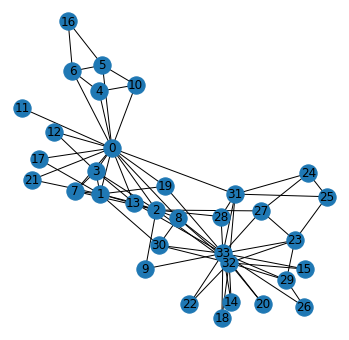

In [2]:
#import the dataset
#G=nx.read_weighted_edgelist('Karate.txt')

GK=nx.read_weighted_edgelist('Karate.txt')
#H=nx.read_weighted_edgelist('Karate.txt',create_using=nx.DiGraph) 
#Creating a network graph
plt.figure(3,figsize=(6,6))
nx.draw_networkx(GK)
plt.axis('off')
plt.show()

We need to derive Graph Laplacian representation, Spectral clustering considers spectral properties of Laplician$(L)$

$L = D-A$

We know the following
 
$A$: Adjacency matrix
 



$$A_{ij} = \begin{cases} 1 \qquad \text{if} \quad (v_i,v_j) \in E \\
                          0 \qquad otherwise \\
                          \end{cases}$$

$D$  is the degree matrix whose entries are amount to 


$$D_{ij} = \begin{cases} deg(v_{i}) \qquad \text{if} \quad i=j\\
                          0 \qquad otherwise \\
                          \end{cases}$$


We know that the degree deg($v_i$) of vertex $v_i$ is nothing else but the number of edges incident to it. We can therefore express our diagonal elemets of D in this format: 

$$D_{ij} = deg(v_{ij}) = \sum_{j = 1}^{n}A_{ij}$$

which is to say that to be able to compute $L$ only need to know A. In other words, if $A$ is given, we can compute $L$. THis also is given as.
$D= diag(K)$


To say that spectral clustering is concerned with spectral properties of $L$ is to say that it requires us to compute the spectral decomposition.

$$L = U \wedge U^{T}$$

Where $Λ$ is a diagonal matrix of eigenvalues $λ_i$ of Land $U$ is an orthonromal matrix whose columns $u_i$ correspond to the eigenvectors of $L$.
Thus the decomposition equation may inform clustering, Note that, if $G$ has $n$ vertices, then $A,D,$ and $L$ will all be $n×n$ matrices.

Moreover, if $G$ is undirected, its adjacency matrix $A$ will be symmetric and, since $D$ is but
a diagonal matrix, the Laplacian $L$ will be symmetric, too.
We therefore know that all eigenvalues and eigenvectors of $L$ will be real valued. However,
there is even more can say about the eigenvalue spectrum.

 $$\lambda_1 \ge \lambda_2 \ge.......\ge_{n-1}\ge \lambda_n$$
 
 
If we assume that all the entries of the (possibly weighted) adjacency matrix $A$ are non-negative, then $L$ will be positive semi-deﬁnite. For its eigenvectors uiwe therefore have

$$u^T_{i} L u_{i}=λ_{i}u^{T}_{i}u_{i}\ge 0$$


which is to say that the eigenvalues $λ_{i}$ must be non-negative.Moreover, it is easy to verify that the vector of all ones will be an eigenvector of $L$ and that the corresponding eigenvalue will be zero. Since all the eigenvalues will be greater or equal to zero, we therefore know that $λ_{n}= 0$ and $u_{n} = 1$. The eigenvector $u_{n−1}$ belonging to the second smallest eigenvalue $λ_{n−1}$ is more interesting. It is called the Fiedler
vector (fv) can be used to partition $G$. This is because its entries $f_j$ are either greater or less than zero so that we can consider their sign in order to group the vertices $v_j$ of $G$ into two clusters.



We need to obtain the adjacency matrix of the network via NumPy array

In [3]:
#This code below calculates the number of nodes in the network
#nodes=GK.number_of_nodes() #This code uses a built in method for number of nodes
#nodes #This code prints out the nodes

In [4]:
#import sys
A = nx.to_numpy_matrix(GK) #This line code creates the adjacency matrix
#np.set_printoptions(threshold=sys.maxsize)
print(A) #This line of code prints out the adjacency matrix

[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [5]:
#print(A.shape) #Determining the shape of the adjacency matrix (34 by 34)

In [6]:
#import sys # This is to expand our matrix to its full size
#np.set_printoptions(threshold=sys.maxsize)
#print(A)

In [7]:
#print(A.shape)

$$D = diag(K)$$

Where

$$K = A\quad \text{multply by vector of} \quad 1..........K = A*e$$... degree

Since well we computed the (Adjacency matrix), we now need to multiply it by vector(e) of 1


In [8]:
# Shaping our vector inorder to multiply it by the adjacency matrix, 
# thus our vector is 1 coloum and 34 rows
e = np.ones((34,1), dtype=int)
# Determining K, that is K 
#D = diag(K)*e
#K= A multply by vector of 1...K = Ae
K=A*e
K
print(K)

[[16.]
 [ 9.]
 [10.]
 [ 6.]
 [ 3.]
 [ 4.]
 [ 4.]
 [ 4.]
 [ 5.]
 [ 2.]
 [ 3.]
 [ 1.]
 [ 2.]
 [ 5.]
 [ 2.]
 [ 2.]
 [ 3.]
 [ 2.]
 [ 5.]
 [ 3.]
 [ 3.]
 [ 4.]
 [ 3.]
 [ 4.]
 [ 2.]
 [ 4.]
 [ 6.]
 [12.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [17.]]


In [9]:
#Determining the diagonal matrix...D=diag(K):
#D =np.diag(np.ravel(np.sum(A,axis=1)))  
#D
#print(D.shape)

#Once A and D is available, computing L is triviality 
#L = D-A
#print(L)

Once A and D is available, computing L is triviality 

In [10]:
#Finding the laplacian
#import sys # This is to expand our matrix to its full size
#L = D-A
#print(L)

In [11]:
#Determinging the shape
#print(L.shape)

In [12]:
#Finding the laplacian
L= nx.laplacian_matrix(GK)
print(L.todense())

[[16. -1. -1. ...  0.  0.  0.]
 [-1.  9. -1. ...  0.  0.  0.]
 [-1. -1. 10. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ...  2.  0. -1.]
 [ 0.  0.  0. ...  0.  2. -1.]
 [ 0.  0.  0. ... -1. -1. 17.]]


In [13]:
#L == L1.todense()

Given L, we can compute its spectral decomposition

Since L is symmetric 

In [14]:
#e, v = np.linalg.eig(L)# eigenvalues/
#print('eigenvalues:')
#print(e)
#eigenvectors
#print('eigenvectors:')
#print(v)


In [15]:

#Determining the eigenvalues(e) and eigenvector(v)
e, v = np.linalg.eig(L.todense()) 
#Returns the indices that would sort or order an array of eigenvalues from small to large
#because spectral clustering is all about eigenvectors belonging to small eigen valeus
order = np.argsort(e)
#This code matches value in the original array and get its location.
#Need to find the Fv,the eigenvector corresponding to the 2nd smallest eigenvalue of a graph Laplacian matrix 
# Sort the eigenvectors with respect to eigenvalues,
# The fiedler_pos variable now contains the fiedler vector position in eigenvectors.
e = e[order]
v = v[:,order]
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-1.97311094e-15  4.68525227e-01  9.09247664e-01  1.12501072e+00
  1.25940411e+00  1.59928308e+00  1.76189862e+00  1.82605521e+00
  1.95505045e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.00000000e+00  2.48709173e+00  2.74915718e+00
  3.01396297e+00  3.24206748e+00  3.37615409e+00  3.38196601e+00
  3.47218740e+00  4.27587682e+00  4.48000767e+00  4.58079267e+00
  5.37859508e+00  5.61803399e+00  6.33159222e+00  6.51554463e+00
  6.99619703e+00  9.77724095e+00  1.09210675e+01  1.33061223e+01
  1.70551712e+01  1.81366960e+01]
eigenvectors:
[[-0.17149859 -0.11213743  0.06940423 ... -0.09478253 -0.94093217
   0.19374903]
 [-0.17149859 -0.04128789  0.09514749 ...  0.09918451  0.06586476
   0.00522422]
 [-0.17149859  0.02321896  0.04270411 ... -0.31479791  0.11506912
   0.02918609]
 ...
 [-0.17149859  0.16275078 -0.06068003 ... -0.08199444 -0.00846872
  -0.05480701]
 [-0.17149859  0.16275078 -0.06068003 ... -0.08199444 -0.00846872
  -0.05480701]
 [-0.1714

In [16]:
# Sorting list of eigenvalues in ascending pattern
#print(sorted(e))

In [17]:
#Finding the Fiedler vector of a graph,
#namely the eigenvector corresponding to the second smallest eigenvalue of a graph Laplacian matrix
#Finding the second vector, that is our fiedler vector (fv)
#fv = v[:,1]
#Converting to 5 decimals
#fv = [np.round(fv[i], 5) for i in range(len(fv))]
#fv

## OR

In [18]:
#Computing Fiedler vectro(fv) using networnkx command
#fv1= nx.fiedler_vector(GK)
#Converting to 5 decimals
#fv1 = [np.round(fv[i], 5) for i in range(len(fv1))]
#fv1

In [19]:
#COmparing fiedler vector using long method and short method in networkx
#THus they are the same
#fv == fv1 

In [20]:
#Computing Fiedler vectro(fv) using networnkx command
#fv1= nx.fiedler_vector(GK)
#fv1

In [21]:
#Partitioning and separating our fv into both positive and negative
#Neg = []
#Pos = []
#fv = v[:,1]
#a = fv
#print("elements of community Neg")
#for i in a:
    #if i < 0:
        #Neg.append(i)
#print (Neg) 

#print      
#print("elements of community Pos")
#for i in a:
    #if i > 0:
        #Pos.append(i)
#print (Pos)

In [22]:
#This code below partitions the the network into 2 parts according to the signs of the eigenvectors.
#THis code is just to reveal whih nodes are positive and which ones are negative
#Negative = []
#Positive = []
#P = v[:,1]

#print("elements of community Negative")
#for i in range(nodes):
    #if P[i] < 0:
       # Negative.append(i)
#print (Negative) 
     
#print("elements of community Positive")
#for i in range(nodes):
    #if P[i] > 0:
        #Positive.append(i)
#print (Positive)

In [23]:
#highlights of the partitioning into 2 communities, nodes that are positive and negative
#L = nx.laplacian_matrix(GK)
#e, v = np.linalg.eig(L.todense()) 
#idx = np.argsort(e)
#e = e[idx]
#v = v[:,idx]
labels = [0 if x < 0 else 1 for x in v[:,1]] # using threshold 0
#All eigenvalues are greater or equal to 1.



All eigenvalues are greater or equal to 1. We therefore know that $\lambda_n =0$ and $u_n =1$

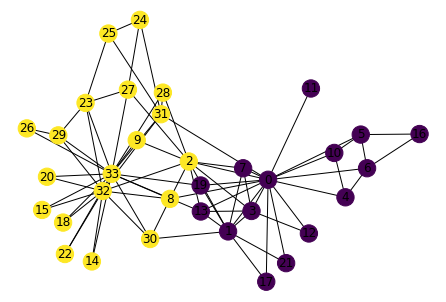

In [24]:
nx.draw(GK, pos=nx.drawing.layout.spring_layout(GK), with_labels=True, node_color=labels)  

The above code computation was mainly used to compute the Karate clud data, this was done by Prof Philip on our last meeting.
I had to evaluate it again and see if I will get the same values for K, eigenvalues, egein vector and the shape of the data. Furthermore also for partitioning I got the same data. Thus this data was used as a testing data 

## Now lets try the Motifs Adjacency Matrix

$$T = A^{2}◦A$$

In [25]:
A = nx.to_numpy_matrix(GK) #This line code creates the adjacency matrix
(A) 
#This line of code prints out the adjacency matrix

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 1., ..., 0., 0., 0.],
        [1., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 1., 1., 0.]])

In [26]:
#Computing T = A**2*A...BY Hadamard
#Start by computing B = A**2 by a nomral matrix multiplication
#Now compute motif (T) matrice via B*A, where * is a Hadamard 
B = np.matmul(A,A)
T = np.multiply(B, A)
print(T)

[[0. 7. 5. ... 0. 0. 0.]
 [7. 0. 4. ... 0. 0. 0.]
 [5. 4. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 1. 0.]]


In [27]:
# Shaping our vector of inorder to multiply it by the adjacency matrix, 
#Note here we convert T to the adjacency matrix (A)
# thus our vector is 1 coloum and 34 rows
e = np.ones((34,1), dtype=int)
#Need to find the degree
#K=T.e = #K=A.e
K=T*e
K
print(K)

[[36.]
 [24.]
 [22.]
 [20.]
 [ 4.]
 [ 6.]
 [ 6.]
 [12.]
 [10.]
 [ 0.]
 [ 4.]
 [ 0.]
 [ 2.]
 [12.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 8.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 8.]
 [ 2.]
 [ 6.]
 [ 6.]
 [26.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [ 2.]
 [30.]]


In [28]:
#Computing the the diagonal matrix of the degree
#D =np.diag(K)  
#D


In [29]:
#Determining the diagonal matrix of the degree...D=diag(K):
D =np.diag(np.ravel(np.sum(T,axis=1)))  
print(D.shape)

(34, 34)


In [30]:
#Finding the laplacian
#np.set_printoptions(threshold=sys.maxsize)
L = D-T
L

matrix([[36., -7., -5., ...,  0.,  0.,  0.],
        [-7., 24., -4., ...,  0.,  0.,  0.],
        [-5., -4., 22., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  0., ...,  2.,  0., -1.],
        [ 0.,  0.,  0., ...,  0.,  2., -1.],
        [ 0.,  0.,  0., ..., -1., -1., 30.]])

In [31]:
#D1 = np.diag([36, 24, 22, 20, 4, 6, 6, 12, 10, 0, 4, 0, 2, 12, 2, 2, 2, 2, 8, 2, 2, 2, 2, 8, 2, 6, 6, 26, 2, 2, 2, 2, 2, 30])
#print(D1)

In [32]:
# Shaping our vector inorder to multiply it by the adjacency matrix, 
# thus our vector is 1 coloum and 34 rows
#e = np.ones((34,1), dtype=int)
#e

In [33]:
# Determining K, 
#D = diag(K)*e
#K= A multply by vector of 1...K = Ae
#But in this case we are subtituting A with T. i.e K = Te
#K1=D1*e
#K1
#print(K1)

In [34]:
#Finding the laplacian
#import sys # This is to expand our matrix to its full size
#np.set_printoptions(threshold=sys.maxsize)
#L1 = D-K1
#print(L1)


In [35]:
#L2= nx.laplacian_matrix(GK)...??????
#print(L2.todense())

In [36]:
#e, v = np.linalg.eig(L)# eigenvalues/
#print('eigenvalues:')
#print(e)
# eigenvectors
#print('eigenvectors:')
#print(v)
#type(v)

In [37]:
#Sorting list of Integers in ascending
#print(sorted(e))

In [38]:
#Finding the Fiedler vector of a graph,
#namely the eigenvector corresponding to the second smallest eigenvalue of a graph Laplacian matrix
#fv = v[:,3]
#Converting to 5 decimals
#fv = [np.round(fv[i], 5) for i in range(len(fv))]
#fv


In [39]:
#Partitioning and separating our fv into both positive and negative
#Neg = []
#Pos = []
#fv = v[:,3]
#a = fv
#print("elements of community Neg")
#for i in a:
    #if i < 0:
        #Neg.append(i)
#print (Neg) 

#print      
#print("elements of community Pos")
#for i in a:
    #if i > 0:
        #Pos.append(i)
#print (Pos)

In [40]:

#Determining the eigenvalues(e) and eigenvector(v)
e, v = np.linalg.eig(L) 
#Returns the indices that would sort or order an array of eigenvalues from small to large
#because spectral clustering is all about eigenvectors belonging to small eigen valeus
order = np.argsort(e)
#This code matches value in the original array and get its location.
#Need to find the Fv,the eigenvector corresponding to the 2nd smallest eigenvalue of a graph Laplacian matrix 
# Sort the eigenvectors with respect to eigenvalues,
# The fiedler_pos variable now contains the fiedler vector position in eigenvectors.
e = e[order]
v = v[:,order]
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)



eigenvalues:
[-2.92774650e-15  0.00000000e+00  0.00000000e+00  2.93064845e-01
  7.13437779e-01  1.30498637e+00  1.80864195e+00  1.84571582e+00
  1.87689437e+00  1.93545246e+00  2.00000000e+00  2.00000000e+00
  2.00000000e+00  2.00000000e+00  2.00000000e+00  2.00000000e+00
  2.45463803e+00  3.00000000e+00  3.53115354e+00  4.14614632e+00
  4.69722436e+00  5.12759711e+00  5.70930554e+00  6.53885978e+00
  8.30277564e+00  1.01231056e+01  1.04166455e+01  1.20000000e+01
  1.95601741e+01  2.15364665e+01  2.50580659e+01  2.70929285e+01
  3.83736212e+01  4.05530988e+01]
eigenvectors:
[[-1.76776695e-01  0.00000000e+00  0.00000000e+00 ...  1.37899184e-01
  -4.14688424e-02  9.23250649e-01]
 [-1.76776695e-01  0.00000000e+00  0.00000000e+00 ...  7.65953045e-01
   2.45641455e-02 -3.09682187e-01]
 [-1.76776695e-01  0.00000000e+00  0.00000000e+00 ... -5.94415707e-01
  -3.48248373e-02 -1.42760249e-01]
 ...
 [-1.76776695e-01  0.00000000e+00  0.00000000e+00 ... -2.46474677e-03
   4.44654349e-03 -1.36787441

In [41]:
#highlights of the partitioning into 2 communities, nodes that are positive and negative
#L1 = nx.laplacian_matrix(GK)
#e, v = np.linalg.eig(L1.todense()) 
#idx = np.argsort(e)
#e = e[idx]
#v = v[:,idx]
#labels = [0 if x < 0 else 1 for x in v[:,3]] # using threshold 0
#All eigenvalues are greater or equal to 1.


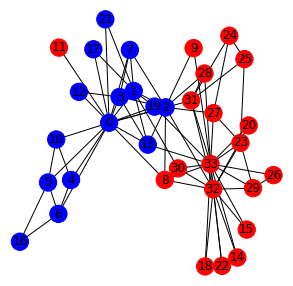

In [42]:
color=[]  # Highlight high degree nodes
for i in v[:,3]:
    if i<0:
        color.append('b')      
    else:
        color.append('r')
        
#plt.clf()
plt.figure(3,figsize=(5,5))
pos=nx.spring_layout(GK)
nx.draw_networkx(GK,pos,node_color = color)
plt.axis('off')
plt.savefig('Karate club.png')
plt.show()


In [43]:
#nx.draw(GK, pos=nx.drawing.layout.spring_layout(GK), with_labels=True, node_color=labels)


### In the undirected case, it might not give us much, but in the directed case, it will be quite helpful to us.

The key thing is that in the directed case, all the Motifs in page 24 of the thesis are undirected. 

If you have an adjacency matrix $A_{ij}$ is not necessalry the same as $A_{ji}$, these Motif are the same.



## Lets compute for the Dolphin data now 

We use the same algorithm just change the data"name to Dolphins now 

In [44]:
#import the dataset
G=nx.read_weighted_edgelist('Dolphins.txt')

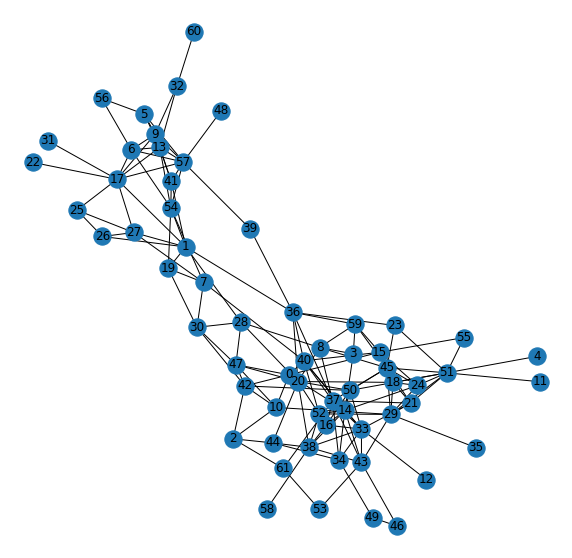

In [45]:
#Creating a network graph
plt.figure(3,figsize=(10,10))
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [46]:
#This code below calculates the number of nodes in the network
#nodes=G.number_of_nodes() #This code uses a built in method for number of nodes
#nodes #This code prints out the nodes

In [47]:
#A = nx.to_numpy_matrix(G) #This line code creates the adjacency matrix
#print(A) #This line of code prints out the adjacency matrix

In [48]:
#print(A.shape) #Determining the shape of the adjacency matrix (62 by 62)

In [49]:
# Shaping our vector inorder to multiply it by the adjacency matrix, 
# thus our vector is 1 coloum and 64 rows
#e = np.ones((62,1), dtype=int)
#e

In [50]:
# Determining K
#K=A*e
#print(K)

In [51]:
#Determining the diagonal matrix...D=diag(K):
#D =np.diag(np.ravel(np.sum(A,axis=1))) 

In [52]:
#Finding the laplacian
#L = D-A
#print(L)

In [53]:
L2= nx.laplacian_matrix(G)
print(L2.todense())

[[ 3. -1.  0. ... -1.  0.  0.]
 [-1.  6.  0. ... -1.  0.  0.]
 [ 0.  0.  4. ...  0.  0.  0.]
 ...
 [-1. -1.  0. ...  5.  0.  0.]
 [ 0.  0.  0. ...  0.  1.  0.]
 [ 0.  0.  0. ...  0.  0.  3.]]


In [54]:
#L == L1.todense()

## OR

In [55]:
#Computing Fiedler vectro(fv) using networnkx command
#fv1= nx.fiedler_vector(G)
#Converting to 5 decimals
#fv1 = [np.round(fv[i], 5) for i in range(len(fv1))]
#fv1

In [56]:
#highlights of the partitioning into 2 communities, nodes that are positive and negative
#L = nx.laplacian_matrix(G)
#e, v = np.linalg.eig(L.todense()) 
#idx = np.argsort(e)
#e = e[idx]
#v = v[:,idx]
#labels = [0 if x < 0 else 1 for x in v[:,8]] # using threshold 0

In [57]:
#nx.draw(G, pos=nx.drawing.layout.spring_layout(G), with_labels=True, node_color=labels)  

In [58]:
#Determinging the shape
#print(L.shape)

In [59]:
#e, v = np.linalg.eig(L)# eigenvalues
#print('eigenvalues:')
#print(e)
# eigenvectors
#print('eigenvectors:')
#print(v)


In [60]:
# Sorting list of Integers in ascending
#print(sorted(e))

In [61]:
#Finding the second vector, that is our fiedler vector
#fv = v[:,8]
#print(fv)
#type(fv)

In [62]:
#Partitioning and separating our fv into both positive and negative
#Negative = []
#Positive = []
#fv = v[:,8]
#a = fv
#print("elements of community Negative")
#for i in a:
    #if i < 0:
        #Negative.append(i)
#print (Negative) 

#print      
#print("elements of community Positive")
#for i in a:
   # if i > 0:
       # Positive.append(i)
#print (Positive)

In [63]:
#This code below partitions the the network into 2 parts according to the signs of the eigenvectors.
#THis code is just to reveal whih nodes are positive and which ones are negative
#Negative = []
#Positive = []
#P = v[:,8]

#print("elements of community Negative")
#for i in range(nodes):
    #if P[i] < 0:
        #Negative.append(i)
#print (Negative) 
     
#print("elements of community Positive")
#for i in range(nodes):
    #if P[i] > 0:
       # Positive.append(i)
#print (Positive)

In [64]:
#Determining the eigenvalues(e) and eigenvector(v)
e, v = np.linalg.eig(L2.todense())
#Returns the indices that would sort or order an array of eigenvalues from small to large
#because spectral clustering is all about eigenvectors belonging to small eigen valeus
order = np.argsort(e)
#This code matches value in the original array and get its location.
# Sort the eigenvectors with respect to eigenvalues,
# The fiedler_pos variable now contains the fiedler vector position in eigenvectors.
e = e[order]
v = v[:,order]
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[4.48459430e-15 1.72973302e-01 5.71446317e-01 6.59539062e-01
 7.90863482e-01 8.27398584e-01 8.52682492e-01 8.84380716e-01
 9.03931755e-01 1.00000000e+00 1.00000000e+00 1.02779485e+00
 1.14860956e+00 1.20592211e+00 1.51486076e+00 1.64823057e+00
 1.83657361e+00 2.01201034e+00 2.32058820e+00 2.37816951e+00
 2.57832632e+00 2.63803667e+00 2.95879180e+00 3.22102122e+00
 3.49894309e+00 3.54865196e+00 3.71633683e+00 3.80337336e+00
 4.12463904e+00 4.24274047e+00 4.43581573e+00 4.81502373e+00
 4.87119411e+00 5.21690396e+00 5.35911002e+00 5.42039636e+00
 5.70954043e+00 5.87173776e+00 6.07572391e+00 6.28911695e+00
 6.60322605e+00 6.85205932e+00 7.02435989e+00 7.14406741e+00
 7.43146866e+00 7.57540506e+00 7.96823757e+00 8.27423732e+00
 8.55145642e+00 8.84407764e+00 8.90357755e+00 9.11552060e+00
 9.37709096e+00 9.91344182e+00 1.01686707e+01 1.06618647e+01
 1.11215801e+01 1.12680915e+01 1.15872446e+01 1.19442233e+01
 1.29051150e+01 1.36135848e+01]
eigenvectors:
[[-1.27000127e-01 -8.32139

In [65]:
#highlights of the partitioning into 2 communities, nodes that are positive and negative
#L = nx.laplacian_matrix(G)
#e, v = np.linalg.eig(L.todense()) 
#idx = np.argsort(e)
#e = e[idx]
#v = v[:,idx]
labels = [0 if x < 0 else 1 for x in v[:,1]] # using threshold 0



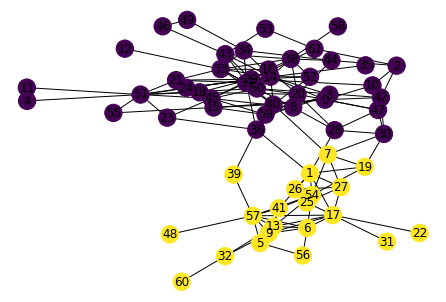

In [66]:
nx.draw(G, pos=nx.drawing.layout.spring_layout(G), with_labels=True, node_color=labels)  

# 

## Now lets try the Motifs Adjacency Matrix (Triangle)


$$T = A^{2}◦A$$

In [67]:
A = nx.to_numpy_matrix(G) #This line code creates the adjacency matrix
(A) 
#This line of code prints out the adjacency matrix

matrix([[0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [68]:
#Computing T = A**2*A...BY Hadamard
#Start by computing B = A**2 by a nomral matrix multiplication
#Now compute motif (T) matrice via B*A, where * is a Hadamard 
B = np.matmul(A,A)
T = np.multiply(B, A)
print(T)

[[0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 2. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 2. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [69]:
# Shaping our vector of inorder to multiply it by the adjacency matrix, 
#Note here we convert T to the adjacency matrix (A)
# thus our vector is 1 coloum and 34 rows
e = np.ones((62,1), dtype=int)
#Need to find the degree
#K=T.e = #K=A.e
K=T*e
K
print(K)

[[ 2.]
 [ 8.]
 [ 6.]
 [22.]
 [16.]
 [10.]
 [ 8.]
 [ 2.]
 [28.]
 [34.]
 [10.]
 [18.]
 [ 8.]
 [16.]
 [22.]
 [ 6.]
 [ 4.]
 [10.]
 [16.]
 [ 0.]
 [16.]
 [ 4.]
 [ 4.]
 [ 8.]
 [ 6.]
 [18.]
 [ 6.]
 [ 0.]
 [ 2.]
 [ 0.]
 [30.]
 [ 6.]
 [ 0.]
 [ 2.]
 [ 2.]
 [26.]
 [16.]
 [ 0.]
 [14.]
 [12.]
 [10.]
 [10.]
 [ 2.]
 [34.]
 [ 0.]
 [12.]
 [ 0.]
 [10.]
 [ 0.]
 [22.]
 [ 0.]
 [ 4.]
 [ 0.]
 [16.]
 [ 0.]
 [ 0.]
 [26.]
 [ 0.]
 [ 0.]
 [ 6.]
 [ 0.]
 [ 0.]]


In [70]:
#Determining the diagonal matrix of the degree...D=diag(K):
D =np.diag(np.ravel(np.sum(T,axis=1)))  
print(D.shape)

(62, 62)


In [71]:
#Finding the laplacian
#np.set_printoptions(threshold=sys.maxsize)
L = D-T
L

matrix([[ 2., -1.,  0., ..., -1.,  0.,  0.],
        [-1.,  8.,  0., ..., -2.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        ...,
        [-1., -2.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [72]:
#Determining the eigenvalues(e) and eigenvector(v)
e, v = np.linalg.eig(L) 
#Returns the indices that would sort or order an array of eigenvalues from small to large
#because spectral clustering is all about eigenvectors belonging to small eigen valeus
order = np.argsort(e)
#This code matches value in the original array and get its location.
#Need to find the Fv,the eigenvector corresponding to the 2nd smallest eigenvalue of a graph Laplacian matrix 
# Sort the eigenvectors with respect to eigenvalues,
# The fiedler_pos variable now contains the fiedler vector position in eigenvectors.
e = e[order]
v = v[:,order]
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-2.83773304e-15  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  8.64051628e-02  8.59033244e-01  1.26866301e+00
  1.49666116e+00  1.54932065e+00  1.77108950e+00  1.87084148e+00
  2.22792101e+00  2.48193095e+00  2.70840776e+00  2.98636789e+00
  4.23137596e+00  4.57104234e+00  4.78525671e+00  5.54529210e+00
  5.99734446e+00  6.31962140e+00  6.88800013e+00  7.30215342e+00
  8.02863959e+00  8.80988454e+00  9.13975587e+00  9.68006899e+00
  9.98603707e+00  1.09606513e+01  1.13686873e+01  1.20999762e+01
  1.23435045e+01  1.35145338e+01  1.48254349e+01  1.54479669e+01
  1.62177889e+01  1.71550081e+01  2.00188172e+01  2.00442707e+01
  2.13267325e+01  2.26069432e+01  2.40920851e+01  2.55399090e+01
  2.62139616e+01  2.98619567e+01  3.34602239e+01  3.40343439e+01
  3.85267747

In [73]:
#e, v = np.linalg.eig(L)# eigenvalues/
#p#rint('eigenvalues:')
#print(e)
# eigenvectors
#print('eigenvectors:')
#print(v)
#type(v)

In [74]:
# Sorting list of Integers in ascending
#print(sorted(e))

In [75]:
#Finding the Fiedler vector of a graph,
#namely the eigenvector corresponding to the second smallest eigenvalue of a graph Laplacian matrix
#fv = v[:,39]
#Converting to 5 decimals
#fv = [np.round(fv[i], 5) for i in range(len(fv))]
#fv

In [76]:
#Partitioning and separating our fv into both positive and negative
#Neg = []
#Pos = []
#fv = v[:,3]
#a = fv
#print("elements of community Neg")
#for i in a:
    #if i < 0:
        #Neg.append(i)
#print (Neg) 

#print      
#print("elements of community Pos")
#for i in a:
    #if i > 0:
        #Pos.append(i)
#print (Pos)

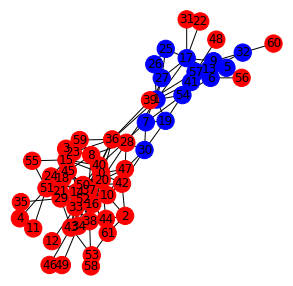

In [77]:
#highlights of the partitioning into 2 communities, nodes that are positive and negative
#L = nx.laplacian_matrix(G)
#e, v = np.linalg.eig(L.todense()) 
#idx = np.argsort(e)
#e = e[idx]
#v = v[:,idx]
#labels = [0 if x < 0 else 1 for x in v[:,17]] # using threshold 0
color=[]  # Highlight high degree nodes
for i in v[:,17]:
    if i<0:
        color.append('b')      
    else:
        color.append('r')
        
#plt.clf()
plt.figure(3,figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,node_color = color)
plt.axis('off')
plt.savefig('Dolphins.png')
plt.show()

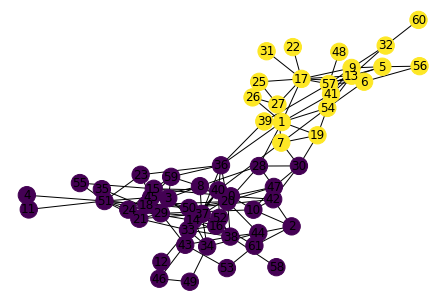

In [78]:
nx.draw(G, pos=nx.drawing.layout.spring_layout(G), with_labels=True, node_color=labels)


## Now lets try the Motifs Adjacency Matrix (Wedge(W))

Wedge generaly have 3 node where there is a path of length 2 but there is no path of length

$$W = A^{2}◦A^{c}$$
Where $A^c$ represent a compliment adjacency matrix
$$A^{c} = E - I - A$$ 
Where:

E = Matrix where each entry is 1

I = Identry matrix

A = Adjacency matrix

In [79]:
#Need to find the E, I, and A
#We know our A
E = np.ones((62,62), dtype=int)
E

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [80]:
#Identity matric
I=np.identity(62)
I

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [81]:
#Adjacency matrix
A = nx.to_numpy_matrix(G)
A

matrix([[0., 1., 0., ..., 1., 0., 0.],
        [1., 0., 0., ..., 1., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [1., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [82]:
#Compute the complementary adjaceny matrix
Ac = E - I - A
print(Ac)

[[0. 0. 1. ... 0. 1. 1.]
 [0. 0. 1. ... 0. 1. 1.]
 [1. 1. 0. ... 1. 1. 1.]
 ...
 [0. 0. 1. ... 0. 1. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 1. 0.]]


In [83]:
#Computing W = A**2*Ac...BY Hadamard
#Start by computing B = A**2 by a nomral matrix multiplication
#Now compute motif (W) matrix via B*Ac, where * is a Hadamard 
B = np.matmul(A,A)
W = np.multiply(B, Ac)
print(W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [84]:
#Determining the diagonal matrix...D=diag(K):
D =np.diag(np.ravel(np.sum(W,axis=1)))  
print(D.shape)

(62, 62)


In [85]:
#Finding the laplacian
import sys # This is to expand our matrix to its full size
np.set_printoptions(threshold=sys.maxsize)
L = D-W
print(L)

[[18.  0.  0.  0.  0. -1.  0.  0.  0.  0. -1. -1.  0.  0.  0.  0.  0. -1.
   0.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0. -1. -1.  0. -1.  0. -2.
  -1.  0. -1.  0.  0. -1.  0. -2.  0.  0.  0. -1.  0.  0.  0. -1.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0. 30.  0.  0.  0.  0.  0.  0.  0. -2. -2. -2. -1.  0. -2.  0.  0.  0.
  -2.  0. -1.  0.  0.  0.  0. -1. -1.  0.  0.  0. -1. -1.  0. -3. -1.  0.
  -1.  0. -1.  0.  0. -1. -1.  0.  0. -2.  0. -2.  0. -1.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0. -1.]
 [ 0.  0. 16.  0. -4.  0.  0.  0.  0.  0.  0.  0.  0. -3.  0.  0.  0.  0.
   0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.  0.  0.
   0. -1.  0. -3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -2.
   0.  0.  0. -1.  0.  0.  0.  0.]
 [ 0.  0.  0. 15.  0.  0.  0.  0.  0.  0.  0.  0. -2.  0.  0.  0.  0.  0.
   0. -1.  0. -1.  0. -1.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.  0.
   0. -1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -4.
   0. -

In [86]:
#e, v = np.linalg.eig(L)# eigenvalues/
#print('eigenvalues:')
#print(e)
# eigenvectors
#print('eigenvectors:')
#print(v)
#type(v)

In [87]:
#Determining the eigenvalues(e) and eigenvector(v)
e, v = np.linalg.eig(L) 
#Returns the indices that would sort or order an array of eigenvalues from small to large
#because spectral clustering is all about eigenvectors belonging to small eigen valeus
order = np.argsort(e)
#This code matches value in the original array and get its location.
#Need to find the Fv,the eigenvector corresponding to the 2nd smallest eigenvalue of a graph Laplacian matrix 
# Sort the eigenvectors with respect to eigenvalues,
# The fiedler_pos variable now contains the fiedler vector position in eigenvectors.
e = e[order]
v = v[:,order]
print('eigenvalues:')
print(e)
#eigenvectors
print('eigenvectors:')
print(v)

eigenvalues:
[-3.04637974e-14  1.61322534e+00  2.40244222e+00  4.92342329e+00
  5.30945638e+00  6.07000237e+00  6.66077428e+00  7.08529444e+00
  7.49085866e+00  7.70244074e+00  8.04754375e+00  8.38729504e+00
  8.75853967e+00  9.00000000e+00  9.23003124e+00  9.95222191e+00
  1.00000000e+01  1.12240009e+01  1.19606870e+01  1.22265701e+01
  1.29040859e+01  1.34418163e+01  1.40841218e+01  1.44883591e+01
  1.47686071e+01  1.52715818e+01  1.61372911e+01  1.67598832e+01
  1.69432906e+01  1.75023129e+01  1.83647606e+01  1.88389271e+01
  1.95606421e+01  1.97760088e+01  2.04610321e+01  2.06419559e+01
  2.20835231e+01  2.30703975e+01  2.35931830e+01  2.48014837e+01
  2.50812976e+01  2.60313159e+01  2.63819220e+01  2.75064520e+01
  2.88398266e+01  2.89822123e+01  2.94909416e+01  3.10189364e+01
  3.14952725e+01  3.22545159e+01  3.31437333e+01  3.32261271e+01
  3.46100875e+01  3.51897056e+01  3.86783985e+01  3.90153458e+01
  3.94552305e+01  4.07689441e+01  4.18032657e+01  4.33567355e+01
  4.68521625

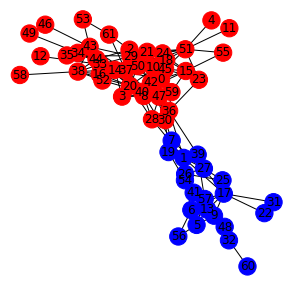

In [88]:
color=[]  # Highlight high degree nodes
for i in v[:,1]:
    if i<0:
        color.append('b')      
    else:
        color.append('r')
        
#plt.clf()
plt.figure(3,figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,node_color = color)
plt.axis('off')
plt.savefig('Dolphins2.png')
plt.show()

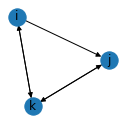

In [90]:
g = nx.MultiDiGraph([("i", "j"), ("i", "k"), ("k", "i"), ("j", "k"),
                ("k", "j")])
plt.figure(3,figsize=(2,2))
nx.draw_networkx(g)
plt.axis('off')
plt.savefig('A simple graph15.png')
plt.show()